In [ ]:
"DATA ANALYSIS ON ONLINE FOOD ORDERING"
#This give insights based on the Online Food Delivery Patterns using Exploratory Data Analysis, and helps in 
#understanding the food delivery trends using various features.



In [ ]:
import pandas as pd
import numpy as np 
df = pd.read_csv("C:\\Users\\Mega1\\Downloads\\onlinefoods (1).csv")

In [4]:
print(df)

     Age  Gender Marital Status Occupation  Monthly Income  \
0     20  Female         Single    Student       No Income   
1     24  Female         Single    Student  Below Rs.10000   
2     22    Male         Single    Student  Below Rs.10000   
3     22  Female         Single    Student       No Income   
4     22    Male         Single    Student  Below Rs.10000   
..   ...     ...            ...        ...             ...   
383   23  Female         Single    Student       No Income   
384   23  Female         Single    Student       No Income   
385   22  Female         Single    Student       No Income   
386   23    Male         Single    Student  Below Rs.10000   
387   23    Male         Single    Student       No Income   

    Educational Qualifications  Family size  latitude  longitude  Pin code  \
0                Post Graduate            4   12.9766    77.5993    560001   
1                     Graduate            3   12.9770    77.5773    560009   
2                Post

In [ ]:
"About this file"
Age: Age of the customer.
Gender: Gender of the customer.
Marital Status: Marital status of the customer.
Occupation: Occupation of the customer.
Monthly Income: Monthly income of the customer.
Educational Qualifications: Educational qualifications of the customer.
Family Size: Number of individuals in the customer's family.
Latitude: Latitude of the customer's location.
Longitude: Longitude of the customer's location.
Pin Code: Pin code of the customer's location.
Output: Current status of the order (e.g., pending, confirmed, delivered).

In [5]:
#IMPORTING ALL THE REQUIRED PACKAGES:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

In [6]:
data = pd.read_csv("C:\\Users\\Mega1\\Downloads\\onlinefoods (1).csv")

#VIEWING THE TOP 10 DATAS

data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [7]:
data.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


In [8]:
#CHECKING FOR MISSING AND DUPLICATE VALUES:

missing_values = data.isnull().sum()
duplicates = data.duplicated().sum()
missing_values, duplicates

(Age                           0
 Gender                        0
 Marital Status                0
 Occupation                    0
 Monthly Income                0
 Educational Qualifications    0
 Family size                   0
 latitude                      0
 longitude                     0
 Pin code                      0
 Output                        0
 Feedback                      0
 Unnamed: 12                   0
 dtype: int64,
 103)

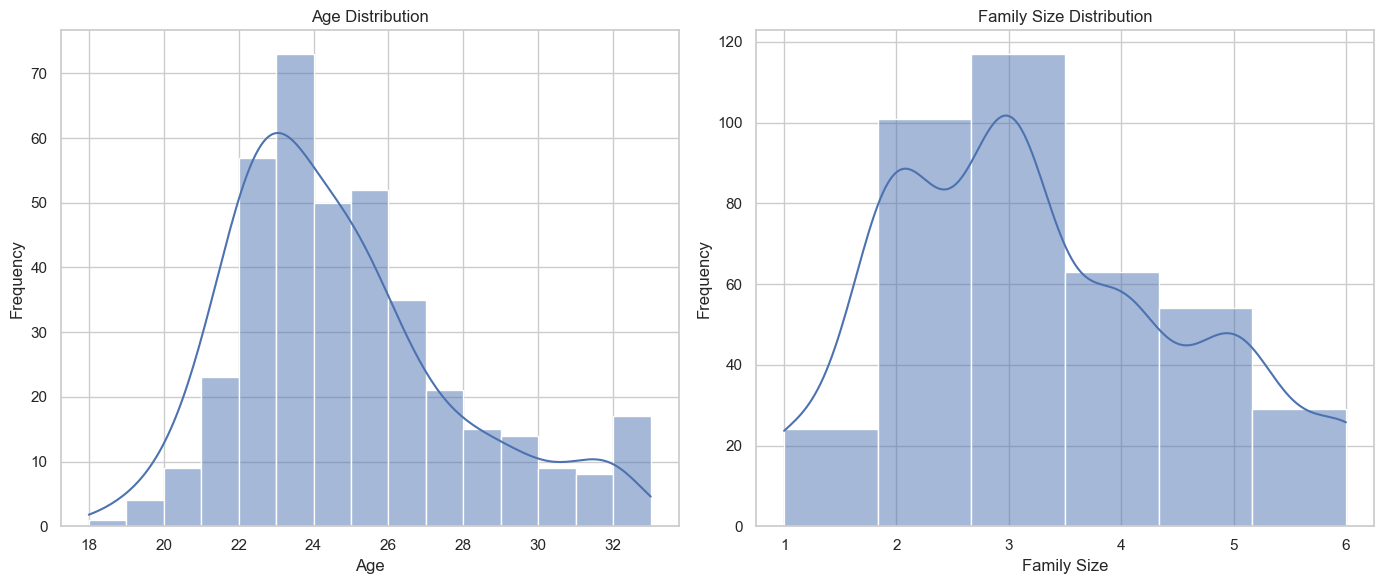

In [11]:
#BELOW HISTOGRAMS SHOWS THE AGE AND FAMILY SIZE DISTRIBUTIONS

sns.set(style="whitegrid")

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(data['Age'], bins=15, kde=True, ax=ax[0])
ax[0].set_title('Age Distribution')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Frequency')

sns.histplot(data['Family size'], bins=6, kde=True, ax=ax[1])
ax[1].set_title('Family Size Distribution')
ax[1].set_xlabel('Family Size')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

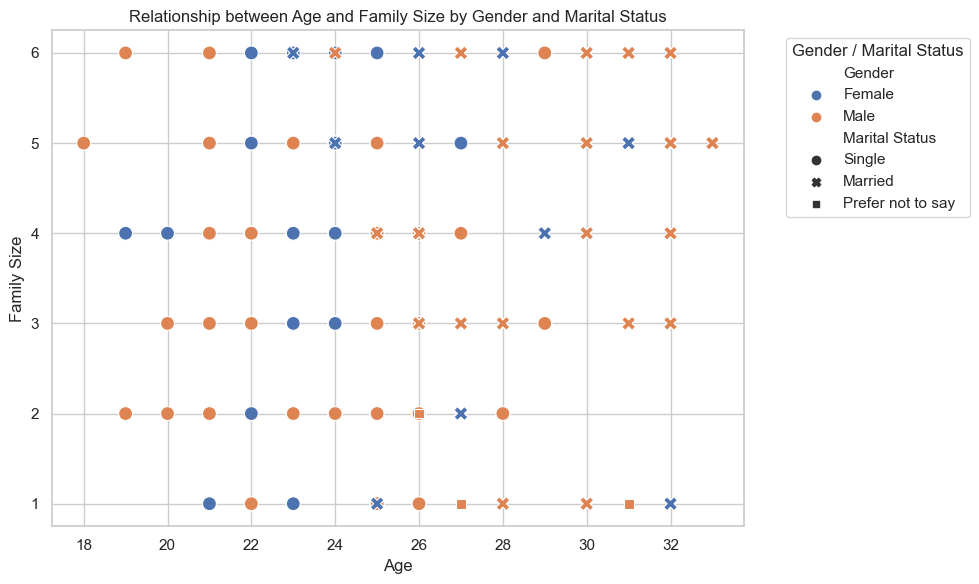

In [13]:
#SCATTER PLOT BETWEEN AGE AND FAMILY SIZE:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Family size', data=data, hue='Gender', style='Marital Status', s=100)
plt.title('Relationship between Age and Family Size by Gender and Marital Status')
plt.xlabel('Age')
plt.ylabel('Family Size')
plt.legend(title='Gender / Marital Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

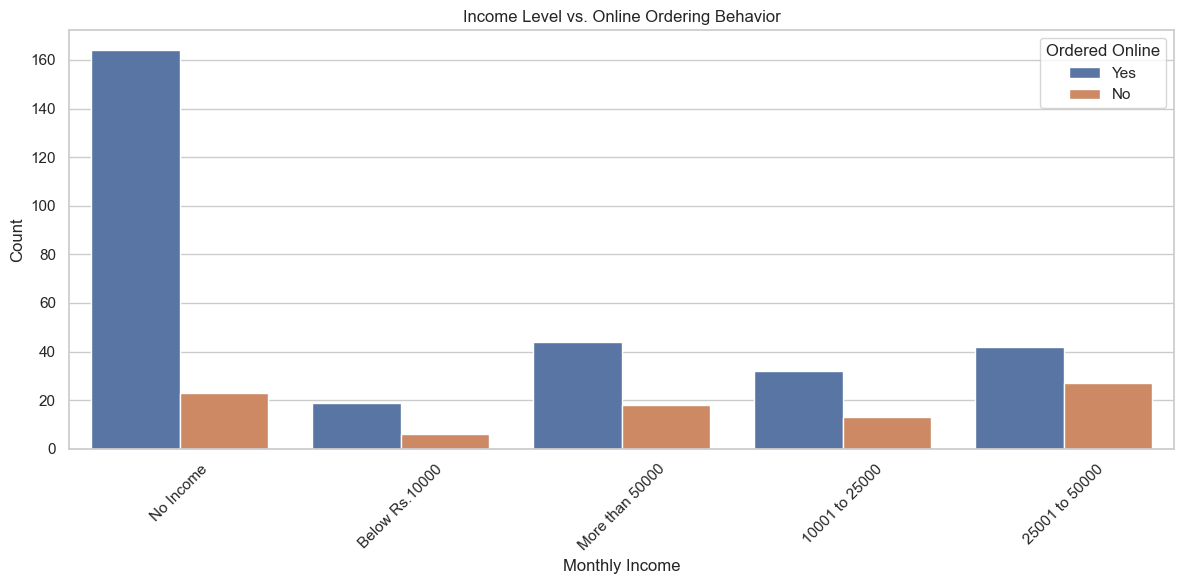

In [15]:
#CHART FOR SHOWING HIW MANY ORDERS ARE PLACED BY PEOPLE IN VARIOUS INCOME RANGE:

plt.figure(figsize=(12, 6))
sns.countplot(x='Monthly Income', hue='Output', data=data)
plt.title('Income Level vs. Online Ordering Behavior')
plt.xlabel('Monthly Income')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Ordered Online')
plt.tight_layout()
plt.show()

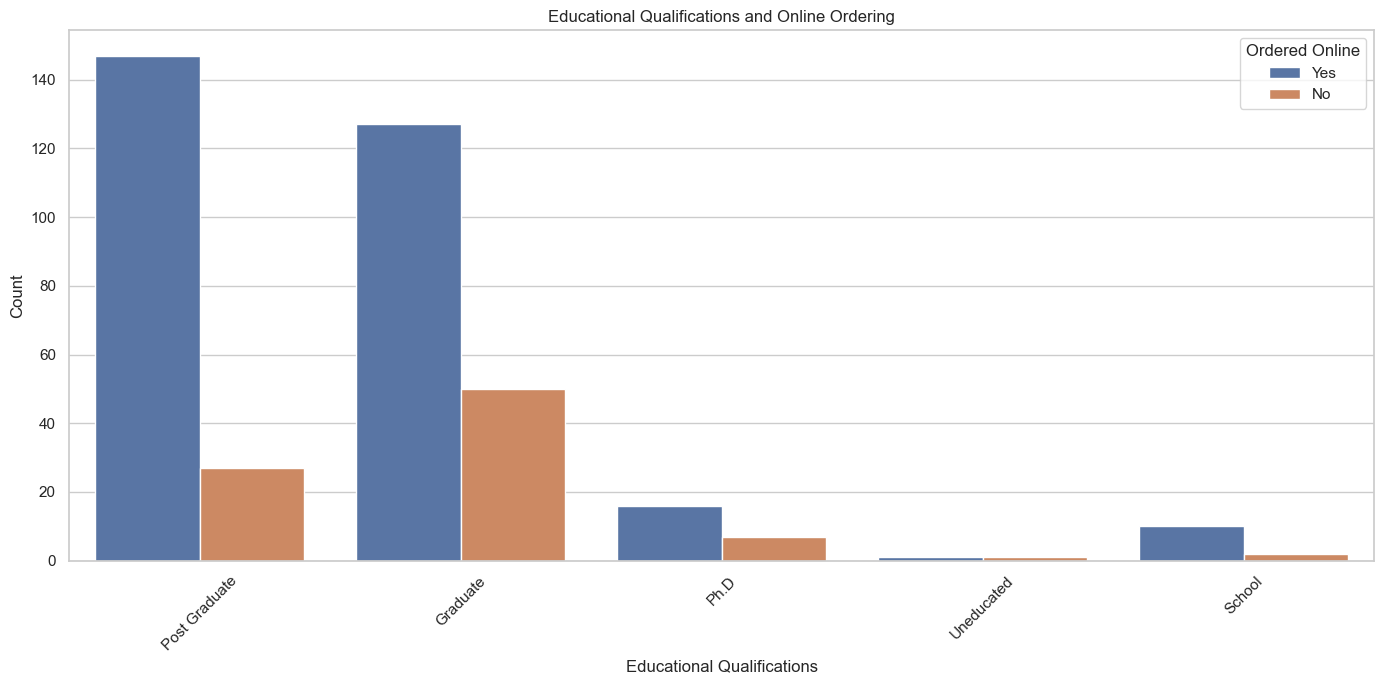

In [17]:
#THE CHART SHOWS HOW MANY PEOPLE FROM DIFERENT EDUCATIONAL QUALIFICATION HAD ORDERED ONLINE FOOD:

plt.figure(figsize=(14, 7))
sns.countplot(x='Educational Qualifications', hue='Output', data=data)
plt.title('Educational Qualifications and Online Ordering')
plt.xlabel('Educational Qualifications')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Ordered Online', loc='upper right')
plt.tight_layout()
plt.show()

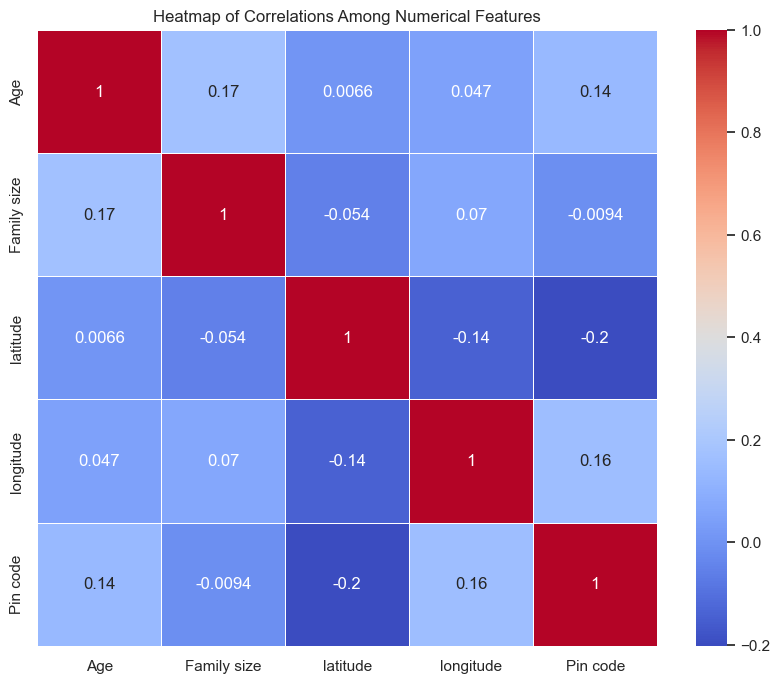

In [19]:
#HEATMAP BETWEEN DIFFERENT FEATURES PRESENT IN THE DATASET:

correlation_matrix = data[['Age', 'Family size', 'latitude', 'longitude', 'Pin code']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Correlations Among Numerical Features')
plt.show()

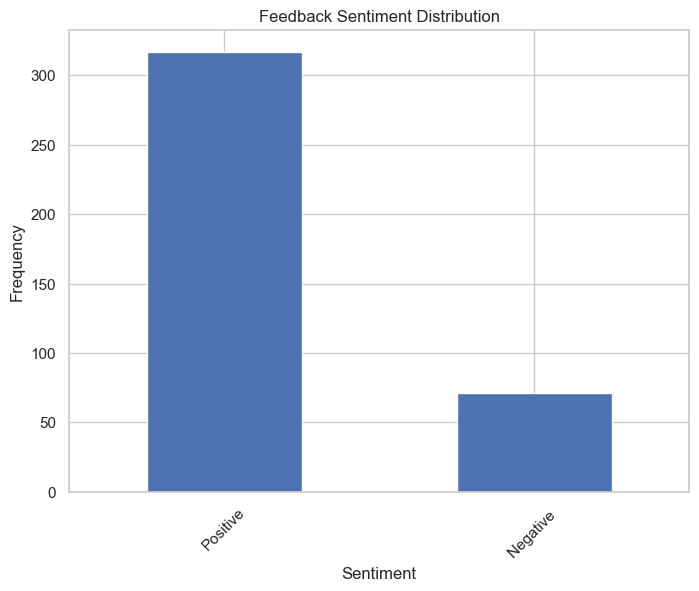

Positive     317
Negative      71
Name: Feedback, dtype: int64

In [21]:
#NUMBER OF POSITIVE AND NEGATIVE FEEDBACKS SHOWN BY BAR PLOT:


sentiment_counts = data['Feedback'].value_counts()

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar')
plt.title('Feedback Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

sentiment_counts

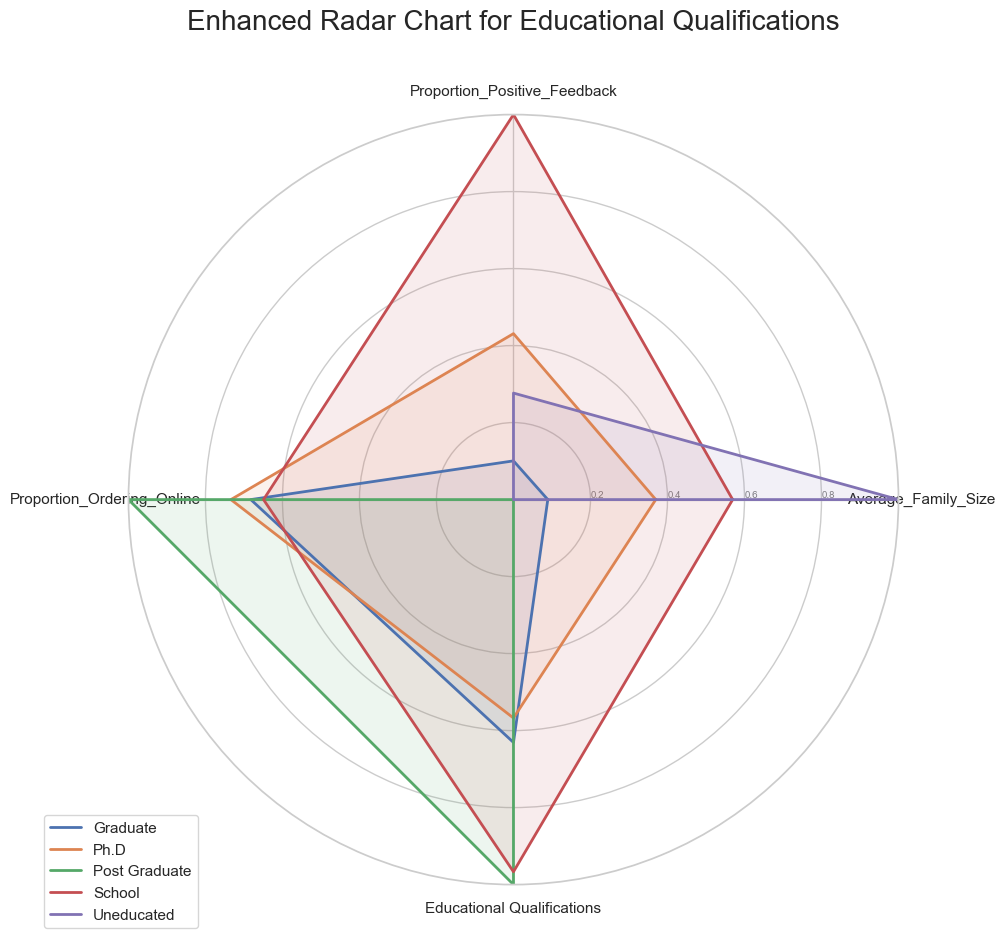

In [25]:
#Radar Chart showing relationships between Number of Positive Feedbacks, Number of Negative Feedbacks, 
#Educational Qualifications, and Average Family Size:

data = pd.read_csv("C:\\Users\\Mega1\\Downloads\\onlinefoods (1).csv")
data['Output_Numeric'] = data['Output'].map({'Yes': 1, 'No': 0})

data['Positive_Feedback'] = (data['Feedback'] == 'Positive').astype(int)

radar_df_new = data.groupby('Educational Qualifications').agg(
    Average_Age=('Age', 'mean'),
    Average_Family_Size=('Family size', 'mean'),
    Proportion_Positive_Feedback=('Positive_Feedback', 'mean'),
    Proportion_Ordering_Online=('Output_Numeric', 'mean')
).reset_index()

scaler = MinMaxScaler()
radar_df_normalized = pd.DataFrame(scaler.fit_transform(radar_df_new.iloc[:, 1:]), columns=radar_df_new.columns[1:])
radar_df_normalized['Educational Qualifications'] = radar_df_new['Educational Qualifications']
categories_new = list(radar_df_normalized)[1:]
N_new = len(categories_new)

angles_new = [n / float(N_new) * 2 * 3.14159265359 for n in range(N_new)]
angles_new += angles_new[:1]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

plt.xticks(angles_new[:-1], categories_new)

ax.set_rlabel_position(0)
plt.yticks([0.2, 0.4, 0.6, 0.8], ["0.2", "0.4", "0.6", "0.8"], color="grey", size=7)
plt.ylim(0,1)

for i, row in radar_df_normalized.iterrows():
    data = radar_df_normalized.loc[i].drop('Educational Qualifications').tolist()
    data += data[:1]
    ax.plot(angles_new, data, linewidth=2, linestyle='solid', label=radar_df_normalized['Educational Qualifications'][i])
    ax.fill(angles_new, data, alpha=0.1)
    plt.title('Enhanced Radar Chart for Educational Qualifications', size=20, y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.show()




In [ ]:
#FROM THIS DATASET WE HAD COMPLETED VARIOUS ANALYSIS REGARDING THE ONLINE FOOD ORDERING AND THE FACTORS BEHIND THIS,
#THE DATAS ARE BEEN VISUALIZED BY CATEGORIZING THEM IN ALL POSSIBLE WAYS FOR A BETTER UNDERSTANDING PURPOSE.
#THUS THE RADARCHART IS RESPONSIBLE FOR SHOWING ALL THE DATAS IN A SINGLE REPRESENTATION.


                                       #THANK YOU😊